In [2]:
#Importando alguns pacotes 
# instalando o pacote GeoPy: !pip install geopy

#!pip install geopy

import locale
import datetime
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import geopy.distance 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
#importando os dados

df = pd.read_csv(r'C:\Users\Jessica\Desktop\Python_yputube\archive (1)\sales_data.csv')

In [4]:
#Visualizando os dados
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [5]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

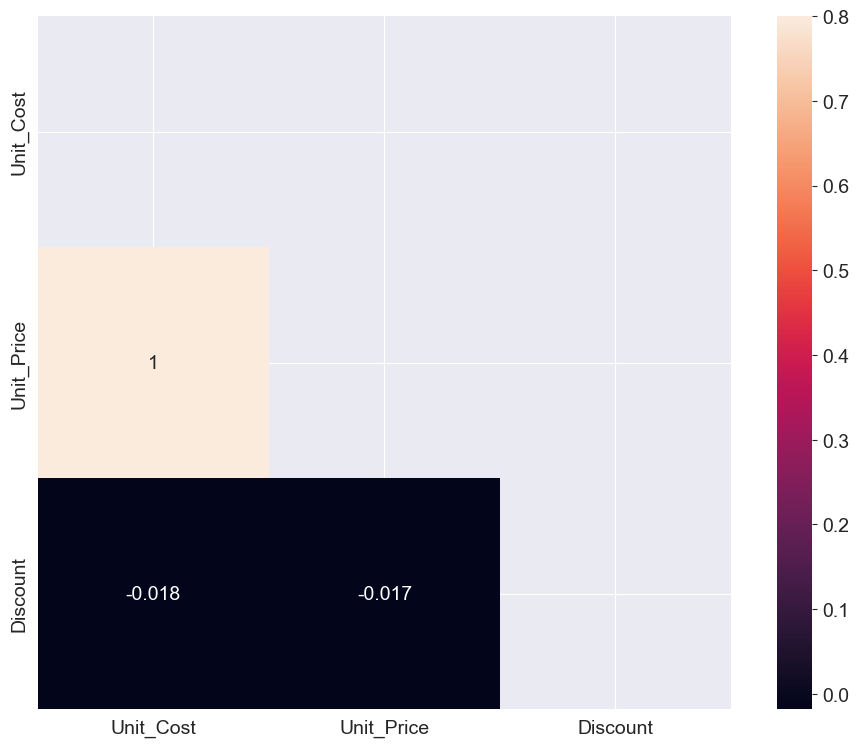

In [9]:
lst = ['Unit_Cost', 'Unit_Price', 'Discount']
corrmat = df[lst].corr()
fig = plt.figure(figsize=(12,9))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax= .8, mask=mask, square= True, annot=True)
plt.show()

In [ ]:
#visualizando quantas linhas e quantas colunas tem
df.shape

(1000, 14)

In [ ]:
#informações basicas sobre o tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [ ]:
#Verificando se tem algum valor nulo
df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [ ]:
#transformando a data no tipo datetime
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'],errors='coerce')

In [ ]:
#verificando se a data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             1000 non-null   datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

In [18]:
# Categoria com mais venda
df.groupby((['Product_Category', 'Quantity_Sold']), as_index=False)['Quantity_Sold'].sum().groupby(['Product_Category']).sum().sort_values(by=['Quantity_Sold'])

,Quantity_Sold
Product_Category,
Food,5608
Electronics,6096
Furniture,6729
Clothing,6922


In [ ]:
#Categoria com mais faturamento
df.groupby((['Product_Category','Sales_Amount']), as_index=False)['Sales_Amount'].sum().groupby(['Product_Category']).sum().sort_values(by=['Sales_Amount'])

,Sales_Amount
Product_Category,
Food,1201773.54
Electronics,1243499.64
Furniture,1260517.69
Clothing,1313474.36


In [ ]:
#Quantidade de pagamento por metodo de pagamento
df.groupby(['Payment_Method']).size()

Payment_Method
Bank Transfer    342
Cash             313
Credit Card      345
dtype: int64

In [ ]:
#Quantidade de vendas por canal de vendas
df.groupby(['Sales_Channel']).size()

Sales_Channel
Online    488
Retail    512
dtype: int64

In [ ]:
#Quantidade de clientes novos, e antigos
df.groupby(['Customer_Type']).size()

Customer_Type
New          504
Returning    496
dtype: int64

In [37]:
#Dia da semana com mais venda
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')
df['Ano_venda'] = pd.DatetimeIndex(df['Sale_Date']).year
df['Mes_venda'] = pd.DatetimeIndex(df['Sale_Date']).month
df['Dia_venda'] = pd.DatetimeIndex(df['Sale_Date']).day
df['Dia_Semana_Venda'] = pd.DatetimeIndex(df['Sale_Date']).day_name(locale = 'pt_BR.utf8')

df.groupby(['Dia_Semana_Venda']).size()
#df.groupby(['Dia_Semana_Venda'], as_index=False).size().sort_values(by=['size'], ascending = False)

Dia_Semana_Venda
Domingo          147
Quarta-feira     139
Quinta-feira     161
Segunda-feira    134
Sexta-feira      160
Sábado           125
Terça-feira      134
dtype: int64

In [25]:
#Valor total de faturamento e media
print('Valor total de Faturamento: ', df['Sales_Amount'].sum())
print('Valor médio de Faturamento: ', df['Sales_Amount'].mean())

Valor total de Faturamento:  5019265.2299999995
Valor médio de Faturamento:  5019.265229999999


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             1000 non-null   datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

In [29]:
dias = df.groupby(['Dia_Semana_Venda']).size()

C:\Users\Jessica\AppData\Local\Temp\ipykernel_12456\2962478769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dias.index, y=dias.values, palette='Blues')


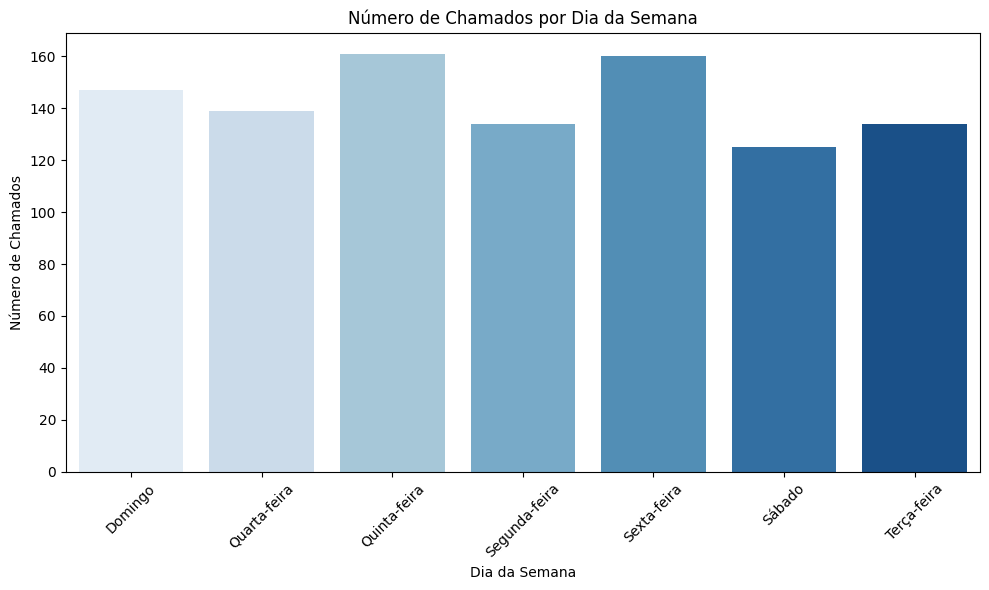

In [ ]:
#Criando o gráfico

plt.figure(figsize=(10, 6))
sns.barplot(x=dias.index, y=dias.values, palette='Blues')
plt.title('Número de Chamados por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Chamados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
produtoXtotalvendas = df.groupby((['Product_Category', 'Quantity_Sold']), as_index=False)['Quantity_Sold'].sum().groupby(['Product_Category']).sum().sort_values(by=['Quantity_Sold'])

C:\Users\Jessica\AppData\Local\Temp\ipykernel_12456\3322165904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(produtoXtotalvendas, x=produtoXtotalvendas.index, y=produtoXtotalvendas['Quantity_Sold'], palette='Blues')


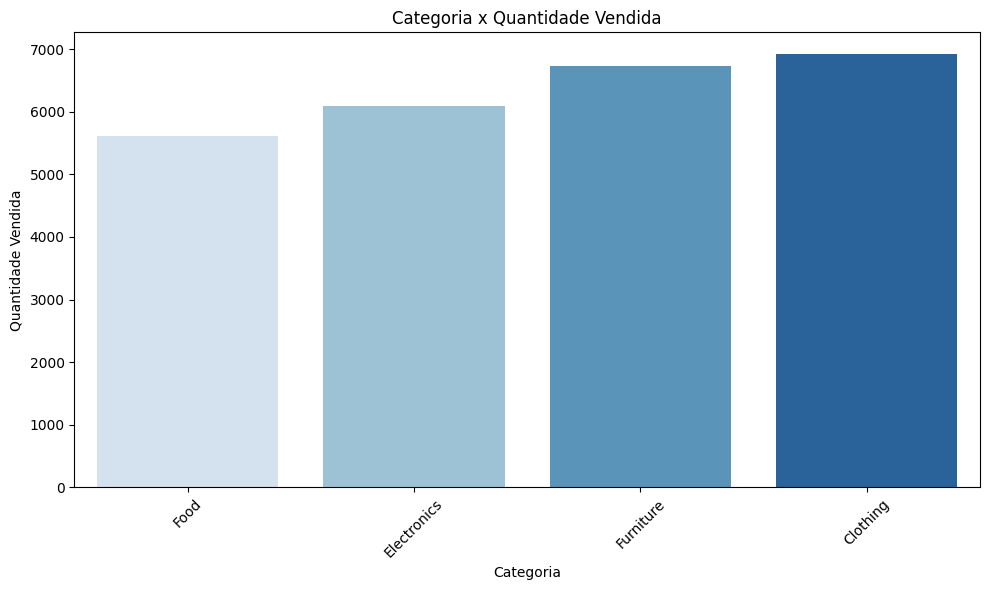

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(produtoXtotalvendas, x=produtoXtotalvendas.index, y=produtoXtotalvendas['Quantity_Sold'], palette='Blues')
plt.title('Categoria x Quantidade Vendida')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
categoriaXtotal =  df.groupby((['Product_Category','Sales_Amount']), as_index=False)['Sales_Amount'].sum().groupby(['Product_Category']).sum().sort_values(by=['Sales_Amount'])

C:\Users\Jessica\AppData\Local\Temp\ipykernel_12456\1316368306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(categoriaXtotal, x=categoriaXtotal.index, y=categoriaXtotal['Sales_Amount'], palette='Blues')


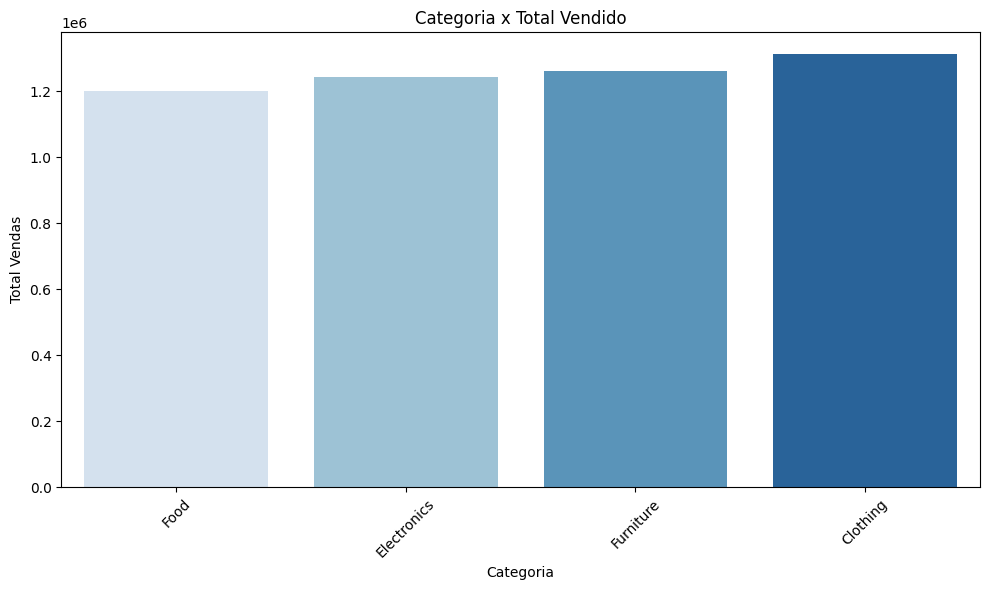

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(categoriaXtotal, x=categoriaXtotal.index, y=categoriaXtotal['Sales_Amount'], palette='Blues')
plt.title('Categoria x Total Vendido')
plt.xlabel('Categoria')
plt.ylabel('Total Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
pagamento = df.groupby(['Payment_Method']).size()

C:\Users\Jessica\AppData\Local\Temp\ipykernel_12456\1271621434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pagamento.index, y=pagamento.values, palette='Blues')


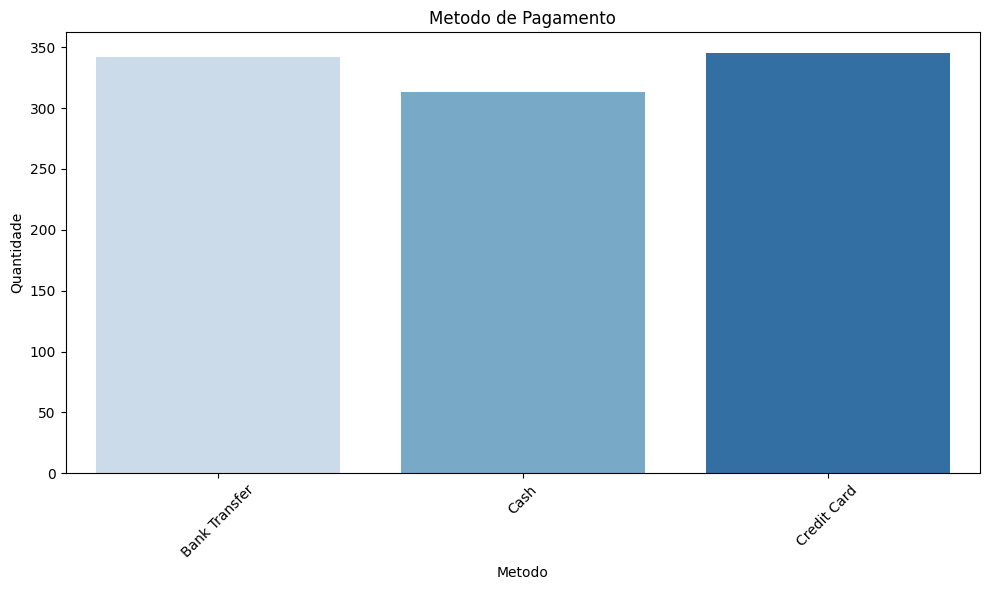

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pagamento.index, y=pagamento.values, palette='Blues')
plt.title('Metodo de Pagamento')
plt.xlabel('Metodo')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
canalVendas = df.groupby(['Sales_Channel']).size()

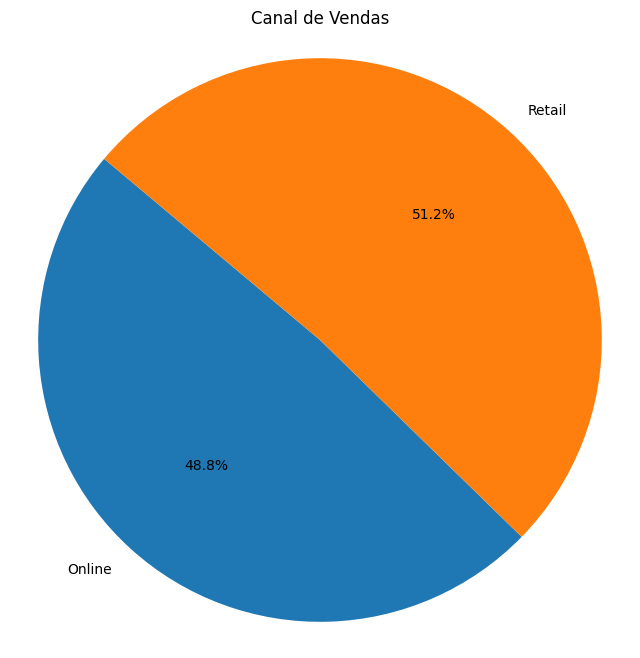

In [53]:
plt.figure(figsize=(8, 8))
plt.pie(canalVendas, labels=canalVendas.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title('Canal de Vendas')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.show()

In [54]:
tipoCliente = df.groupby(['Customer_Type']).size()

C:\Users\Jessica\AppData\Local\Temp\ipykernel_12456\1129618637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipoCliente.index, y=tipoCliente.values, palette='Blues')


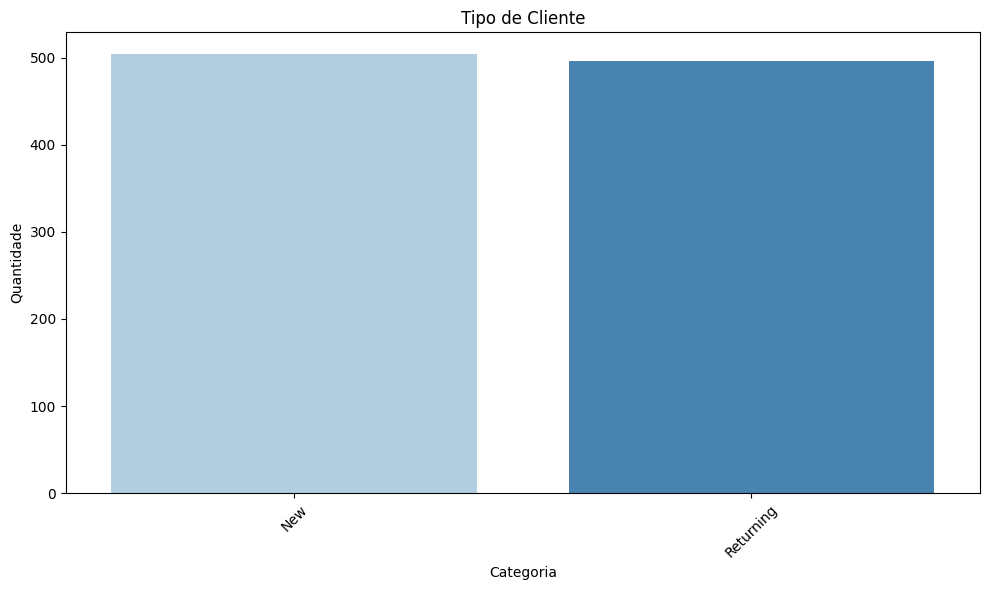

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=tipoCliente.index, y=tipoCliente.values, palette='Blues')
plt.title('Tipo de Cliente')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()